In [198]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

%matplotlib inline

In [199]:
building_permits_df = pd.read_csv('data/Building_Permits_Issued.csv')

C:\Users\mikez\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [200]:
building_permits_df.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2020054273,Building Residential - Addition,Single Family Residence,13009007600,08/30/2020,11/11/2020,140853.0,113 CLYDELAN CT,NASHVILLE,TN,37205,LOT 3 SEC 2 WARNER COURTS,Kevin holder,CARA,CAA01R301,3867668,construct a new single room addition to the re...,34.0,37018500.0,"113 CLYDELAN CT\nNASHVILLE, TN 37205\n(36.0885..."
1,2020047983,Building Residential - New,Single Family Residence,07111053300,08/03/2020,11/11/2020,235691.0,1431B MERIDIAN ST,NASHVILLE,TN,37207,LOT 352 HIGHLAND LAND CO SUB,RIVERSIDE REMODELING LLC,CARN,CAA01R301,3857510,to construct 1944SF single family residence wi...,5.0,37011300.0,"1431B MERIDIAN ST\nNASHVILLE, TN 37207\n(36.19..."
2,2020015449,Building Residential - New,"Multifamily, Townhome",107100A00900CO,03/10/2020,03/24/2020,134334.0,450 GLASTONBURY RD 9,NASHVILLE,TN,37217,UNIT 9 GLASTONBURY TOWNHOMES,BEAR CONSTRUCTION LLC,CARN,CAA03R301,3779093,"per master permit 2019031900, to construct a t...",13.0,37015804.0,"450 GLASTONBURY RD 9\nNASHVILLE, TN 37217"
3,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,S SIDE MAPLEWOOD LANE & W OF HUTSON AVE,CONTRERAS DESIGN BUILD LLC,CADM,CAZ01A001,3728422,to demolish existing residence and detached st...,8.0,37011002.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228..."
4,2020059655,Building Residential - Rehab,"Accessory Structure, Decks",090160K00200CO,09/22/2020,09/25/2020,5000.0,553B WESTBORO DR,NASHVILLE,TN,37209,UNIT B 553 WESTBORO COMMONS,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARR,CAA14U015,3876584,to install a screen porch to rear of residence...,20.0,37013201.0,"553B WESTBORO DR\nNASHVILLE, TN 37209\n(36.152..."


In [201]:
building_permits_df["ZIP"].value_counts()

37209    3765
37013    3232
37203    2320
37207    2176
37206    2147
37211    1965
37208    1958
37215    1344
37205    1288
37214    1264
37076    1232
37216    1192
37115    1070
37221    1048
37212    1020
37210    1000
37204     864
37138     741
37217     710
37027     547
37218     490
37135     467
37201     326
37219     281
37220     215
37228     179
37080     165
37072     159
37189     139
37213      62
37086      25
37122      21
37143      18
37015      14
37064      11
0          10
37238       8
37232       5
27218       1
301         1
37240       1
Name: ZIP, dtype: int64

In [202]:
building_permits_df['year'] = building_permits_df['Date Issued'].str.split('/').str[2]

In [203]:
building_permits_df.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location,year
0,2020054273,Building Residential - Addition,Single Family Residence,13009007600,08/30/2020,11/11/2020,140853.0,113 CLYDELAN CT,NASHVILLE,TN,...,LOT 3 SEC 2 WARNER COURTS,Kevin holder,CARA,CAA01R301,3867668,construct a new single room addition to the re...,34.0,37018500.0,"113 CLYDELAN CT\nNASHVILLE, TN 37205\n(36.0885...",2020
1,2020047983,Building Residential - New,Single Family Residence,07111053300,08/03/2020,11/11/2020,235691.0,1431B MERIDIAN ST,NASHVILLE,TN,...,LOT 352 HIGHLAND LAND CO SUB,RIVERSIDE REMODELING LLC,CARN,CAA01R301,3857510,to construct 1944SF single family residence wi...,5.0,37011300.0,"1431B MERIDIAN ST\nNASHVILLE, TN 37207\n(36.19...",2020
2,2020015449,Building Residential - New,"Multifamily, Townhome",107100A00900CO,03/10/2020,03/24/2020,134334.0,450 GLASTONBURY RD 9,NASHVILLE,TN,...,UNIT 9 GLASTONBURY TOWNHOMES,BEAR CONSTRUCTION LLC,CARN,CAA03R301,3779093,"per master permit 2019031900, to construct a t...",13.0,37015804.0,"450 GLASTONBURY RD 9\nNASHVILLE, TN 37217",2020
3,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,...,S SIDE MAPLEWOOD LANE & W OF HUTSON AVE,CONTRERAS DESIGN BUILD LLC,CADM,CAZ01A001,3728422,to demolish existing residence and detached st...,8.0,37011002.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228...",2019
4,2020059655,Building Residential - Rehab,"Accessory Structure, Decks",090160K00200CO,09/22/2020,09/25/2020,5000.0,553B WESTBORO DR,NASHVILLE,TN,...,UNIT B 553 WESTBORO COMMONS,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARR,CAA14U015,3876584,to install a screen porch to rear of residence...,20.0,37013201.0,"553B WESTBORO DR\nNASHVILLE, TN 37209\n(36.152...",2020


In [204]:
building_permits_df['year'].value_counts()

2019    11598
2018    11090
2020     9483
2017     1310
Name: year, dtype: int64

In [205]:
building_permits_df = building_permits_df.loc[building_permits_df['year'].isin(['2019', '2020'])]

In [206]:
building_permits_df.head(20)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location,year
0,2020054273,Building Residential - Addition,Single Family Residence,13009007600,08/30/2020,11/11/2020,140853.0,113 CLYDELAN CT,NASHVILLE,TN,...,LOT 3 SEC 2 WARNER COURTS,Kevin holder,CARA,CAA01R301,3867668,construct a new single room addition to the re...,34.0,37018500.0,"113 CLYDELAN CT\nNASHVILLE, TN 37205\n(36.0885...",2020
1,2020047983,Building Residential - New,Single Family Residence,07111053300,08/03/2020,11/11/2020,235691.0,1431B MERIDIAN ST,NASHVILLE,TN,...,LOT 352 HIGHLAND LAND CO SUB,RIVERSIDE REMODELING LLC,CARN,CAA01R301,3857510,to construct 1944SF single family residence wi...,5.0,37011300.0,"1431B MERIDIAN ST\nNASHVILLE, TN 37207\n(36.19...",2020
2,2020015449,Building Residential - New,"Multifamily, Townhome",107100A00900CO,03/10/2020,03/24/2020,134334.0,450 GLASTONBURY RD 9,NASHVILLE,TN,...,UNIT 9 GLASTONBURY TOWNHOMES,BEAR CONSTRUCTION LLC,CARN,CAA03R301,3779093,"per master permit 2019031900, to construct a t...",13.0,37015804.0,"450 GLASTONBURY RD 9\nNASHVILLE, TN 37217",2020
3,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,...,S SIDE MAPLEWOOD LANE & W OF HUTSON AVE,CONTRERAS DESIGN BUILD LLC,CADM,CAZ01A001,3728422,to demolish existing residence and detached st...,8.0,37011002.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228...",2019
4,2020059655,Building Residential - Rehab,"Accessory Structure, Decks",090160K00200CO,09/22/2020,09/25/2020,5000.0,553B WESTBORO DR,NASHVILLE,TN,...,UNIT B 553 WESTBORO COMMONS,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARR,CAA14U015,3876584,to install a screen porch to rear of residence...,20.0,37013201.0,"553B WESTBORO DR\nNASHVILLE, TN 37209\n(36.152...",2020
5,2020009372,Building Commercial - Rehab,Restaurant (Fast Food),07300001700,02/12/2020,02/13/2020,96000.0,433 OPRY MILLS DR,NASHVILLE,TN,...,LOT 1 GAYLORD ENTERTAINMENT CO.SUB. REV 1,PRO ELECTRIC,CACR,CAF30A203,3759175,fire damage rehab for BURGER KING at opry mill...,15.0,37015300.0,"433 OPRY MILLS DR\nNASHVILLE, TN 37214\n(36.20...",2020
6,2019079208,Building Commercial - Rehab,"Automobile Convenience, Markets",10510017700,12/31/2019,02/13/2020,40000.0,2001 8TH AVE S,NASHVILLE,TN,...,PT LOT 100 WAVERLY PLACE,"SOS-RETAIL SERVICES, LLC",CACR,CAF24M003,3745308,light interior rehab for 7-11\nPOC JOSH ELLER ...,17.0,37016200.0,"2001 8TH AVE S\nNASHVILLE, TN 37204\n(36.13390...",2020
7,2020025289,Building Demolition Permit,Demolition Permit - Residential,08610001600,04/21/2020,05/12/2020,7000.0,3609 QUAIL DR,HERMITAGE,TN,...,LOT 43 CHAPELWOOD SEC. 2,PATRIOT DEMOLITION LLC,CADM,CAZ01A001,3806576,Total demolition,14.0,37015623.0,"3609 QUAIL DR\nHERMITAGE, TN 37076\n(36.181098...",2020
8,2020007966,Building Commercial - New,"Fuel Storage, Hazardous (H1-H5)",01200005000,02/05/2020,02/13/2020,34000.0,501 OAKBLUFF LN,GOODLETTSVILLE,TN,...,LOT 5 NORTHFORK INDUSTRIAL PARK SEC 1 PH 2,PETROLEUM EQUIPMENT CO,CACN,CAH03H000,3757169,"install above ground 15,000 gallon fuel tanks ...",10.0,37010202.0,"501 OAKBLUFF LN\nGOODLETTSVILLE, TN 37072\n(36...",2020
9,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,02/25/2019,07/22/2019,0.0,812 BRIAR CIR,MADISON,TN,...,COMMON AREA HOMES AT BRIAR,COLE INVESTMENTS LLC,CAUO,CAA03R301,3611315,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,37010802.0,"812 BRIAR CIR\nMADISON, TN 37115",2019


In [207]:
building_permits_df['year'].value_counts()

2019    11598
2020     9483
Name: year, dtype: int64

In [208]:
building_permits_df['Permit Type Description'].value_counts()

Building Residential - New                  8002
Building Residential - Addition             2019
Building Commercial - Rehab                 1890
Building Residential - Rehab                1843
Building Demolition Permit                  1713
Building Sign Permit                        1466
Building Use & Occupancy                    1015
Building Commercial - Tenant Finish Out      899
Building Commercial - New                    770
Building Tree Removal Permit                 320
Building Residential Rehab Storm Damage      210
Building Residential - Roofing / Siding      153
Building Commercial - Shell                  126
Building Commercial - Roofing / Siding       107
Building Commercial - Addition               103
Building Commercial Rehab Storm Damage        92
Building Commercial - Foundation              91
Building Residential New Storm Damage         62
Building Residential - Change Contractor      48
Building Residential - Fire Damage            45
Building Commercial 

In [209]:
building_permits_df.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location,year
0,2020054273,Building Residential - Addition,Single Family Residence,13009007600,08/30/2020,11/11/2020,140853.0,113 CLYDELAN CT,NASHVILLE,TN,...,LOT 3 SEC 2 WARNER COURTS,Kevin holder,CARA,CAA01R301,3867668,construct a new single room addition to the re...,34.0,37018500.0,"113 CLYDELAN CT\nNASHVILLE, TN 37205\n(36.0885...",2020
1,2020047983,Building Residential - New,Single Family Residence,07111053300,08/03/2020,11/11/2020,235691.0,1431B MERIDIAN ST,NASHVILLE,TN,...,LOT 352 HIGHLAND LAND CO SUB,RIVERSIDE REMODELING LLC,CARN,CAA01R301,3857510,to construct 1944SF single family residence wi...,5.0,37011300.0,"1431B MERIDIAN ST\nNASHVILLE, TN 37207\n(36.19...",2020
2,2020015449,Building Residential - New,"Multifamily, Townhome",107100A00900CO,03/10/2020,03/24/2020,134334.0,450 GLASTONBURY RD 9,NASHVILLE,TN,...,UNIT 9 GLASTONBURY TOWNHOMES,BEAR CONSTRUCTION LLC,CARN,CAA03R301,3779093,"per master permit 2019031900, to construct a t...",13.0,37015804.0,"450 GLASTONBURY RD 9\nNASHVILLE, TN 37217",2020
3,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,...,S SIDE MAPLEWOOD LANE & W OF HUTSON AVE,CONTRERAS DESIGN BUILD LLC,CADM,CAZ01A001,3728422,to demolish existing residence and detached st...,8.0,37011002.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228...",2019
4,2020059655,Building Residential - Rehab,"Accessory Structure, Decks",090160K00200CO,09/22/2020,09/25/2020,5000.0,553B WESTBORO DR,NASHVILLE,TN,...,UNIT B 553 WESTBORO COMMONS,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARR,CAA14U015,3876584,to install a screen porch to rear of residence...,20.0,37013201.0,"553B WESTBORO DR\nNASHVILLE, TN 37209\n(36.152...",2020


In [210]:
building_permits_df.columns

Index(['Permit #', 'Permit Type Description', 'Permit Subtype Description',
       'Parcel', 'Date Entered', 'Date Issued', 'Construction Cost', 'Address',
       'City', 'State', 'ZIP', 'Subdivision / Lot', 'Contact', 'Permit Type',
       'Permit Subtype', 'IVR Tracking #', 'Purpose', 'Council District',
       'Census Tract', 'Mapped Location', 'year'],
      dtype='object')

In [211]:
building_permits_df['ZIP'].value_counts()

37209    2340
37013    2193
37203    1442
37206    1419
37207    1317
37208    1240
37211    1196
37076     841
37214     810
37215     809
37205     773
37216     757
37212     647
37221     632
37115     632
37210     580
37204     507
37138     499
37217     420
37027     328
37218     325
37135     304
37201     208
37219     165
37228     140
37220     136
37080     121
37072     104
37189      78
37213      41
37086      18
37122      18
37143      12
37064       9
37015       8
37238       4
0           4
37232       3
301         1
Name: ZIP, dtype: int64

In [212]:
building_permits_df['month'] = building_permits_df['Date Issued'].str.split('/').str[0]

In [213]:
building_permits_df.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location,year,month
0,2020054273,Building Residential - Addition,Single Family Residence,13009007600,08/30/2020,11/11/2020,140853.0,113 CLYDELAN CT,NASHVILLE,TN,...,Kevin holder,CARA,CAA01R301,3867668,construct a new single room addition to the re...,34.0,37018500.0,"113 CLYDELAN CT\nNASHVILLE, TN 37205\n(36.0885...",2020,11
1,2020047983,Building Residential - New,Single Family Residence,07111053300,08/03/2020,11/11/2020,235691.0,1431B MERIDIAN ST,NASHVILLE,TN,...,RIVERSIDE REMODELING LLC,CARN,CAA01R301,3857510,to construct 1944SF single family residence wi...,5.0,37011300.0,"1431B MERIDIAN ST\nNASHVILLE, TN 37207\n(36.19...",2020,11
2,2020015449,Building Residential - New,"Multifamily, Townhome",107100A00900CO,03/10/2020,03/24/2020,134334.0,450 GLASTONBURY RD 9,NASHVILLE,TN,...,BEAR CONSTRUCTION LLC,CARN,CAA03R301,3779093,"per master permit 2019031900, to construct a t...",13.0,37015804.0,"450 GLASTONBURY RD 9\nNASHVILLE, TN 37217",2020,03
3,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,...,CONTRERAS DESIGN BUILD LLC,CADM,CAZ01A001,3728422,to demolish existing residence and detached st...,8.0,37011002.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228...",2019,11
4,2020059655,Building Residential - Rehab,"Accessory Structure, Decks",090160K00200CO,09/22/2020,09/25/2020,5000.0,553B WESTBORO DR,NASHVILLE,TN,...,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARR,CAA14U015,3876584,to install a screen porch to rear of residence...,20.0,37013201.0,"553B WESTBORO DR\nNASHVILLE, TN 37209\n(36.152...",2020,09


In [214]:
building_permits_df['month'].value_counts()

08    2173
10    2075
01    1923
04    1920
09    1901
06    1889
03    1853
07    1840
05    1819
02    1746
11    1103
12     839
Name: month, dtype: int64

In [215]:
building_permits_df = building_permits_df.loc[building_permits_df['month'].isin(['01', '02','03','04','05','06'])]

In [216]:
building_permits_df['month'].value_counts()

01    1923
04    1920
06    1889
03    1853
05    1819
02    1746
Name: month, dtype: int64

In [217]:
building_permits_df = building_permits_df.loc[building_permits_df['ZIP'].isin(['37211', '37203', '37013','37076', '37205', '37214'])]

In [218]:
building_permits_df['ZIP'].value_counts()

37013    1177
37203     836
37211     628
37076     470
37214     438
37205     368
Name: ZIP, dtype: int64

In [219]:
building_permits_2019 = building_permits_df.loc[building_permits_df['year'].isin(['2019'])]

In [220]:
building_permits_2019['year'].value_counts()

2019    2002
Name: year, dtype: int64

In [221]:
building_permits_2019['month'].value_counts()

05    423
04    415
06    362
02    307
03    288
01    207
Name: month, dtype: int64

In [222]:
building_permits_2019['ZIP'].value_counts()

37013    639
37203    419
37211    301
37076    270
37205    190
37214    183
Name: ZIP, dtype: int64

In [223]:
building_permits_2019['Permit Type Description'].value_counts()

Building Residential - New                  779
Building Commercial - Rehab                 232
Building Residential - Addition             177
Building Sign Permit                        150
Building Residential - Rehab                124
Building Commercial - Tenant Finish Out     117
Building Use & Occupancy                     94
Building Commercial - New                    83
Building Demolition Permit                   71
Building Residential - Roofing / Siding      64
Building Tree Removal Permit                 40
Building Commercial - Shell                  12
Building Commercial - Addition               11
Building Commercial - Roofing / Siding       10
Building Commercial - Foundation              8
Building Residential - Fire Damage            8
Building Commercial - Structural Frame        7
Building Commercial - Fire Damage             6
Building Residential - Change Contractor      6
Building Residential - Tenant Finish Out      1
Building Residential - Amend Permit     

In [224]:
building_permits_2020 = building_permits_df.loc[building_permits_df['year'].isin(['2020'])]

In [225]:
building_permits_2020['year'].value_counts()

2020    1915
Name: year, dtype: int64

In [226]:
count_2020 = building_permits_2020['month'].value_counts().to_frame().reset_index()

In [227]:
count_2020.head()

,index,month
0,06,358
1,03,340
2,01,313
3,04,305
4,02,301


In [228]:
count_2020 = count_2020.rename(columns = {'index':'month', 'month':'Count'})

In [229]:
count_2020

,month,Count
0,06,358
1,03,340
2,01,313
3,04,305
4,02,301
5,05,298


In [230]:
count_2020['month'] = count_2020['month'].astype(int)

In [231]:
count_2020

,month,Count
0,6,358
1,3,340
2,1,313
3,4,305
4,2,301
5,5,298


In [232]:
building_permits_2020['ZIP'].value_counts()

37013    538
37203    417
37211    327
37214    255
37076    200
37205    178
Name: ZIP, dtype: int64

In [233]:
building_permits_2020['Permit Type Description'].value_counts()

Building Residential - New                 668
Building Commercial - Rehab                210
Building Sign Permit                       159
Building Residential - Addition            137
Building Residential - Rehab               136
Building Commercial - Tenant Finish Out    118
Building Use & Occupancy                   108
Building Commercial - New                  108
Building Demolition Permit                 102
Building Residential Rehab Storm Damage     44
Building Tree Removal Permit                25
Building Commercial - Shell                 23
Building Commercial - Foundation            19
Building Residential - Roofing / Siding     14
Building Commercial - Addition              11
Building Residential New Storm Damage       11
Building Commercial Rehab Storm Damage       8
Building Commercial - Roofing / Siding       7
Building Commercial New Storm Damage         3
Building Residential - Fire Damage           2
Building Commercial - Structural Frame       1
Building Resi

In [234]:
count_2020_type = building_permits_2020['Permit Type Description'].value_counts().to_frame().reset_index()

In [235]:
count_2020_type

,index,Permit Type Description
0,Building Residential - New,668
1,Building Commercial - Rehab,210
2,Building Sign Permit,159
3,Building Residential - Addition,137
4,Building Residential - Rehab,136
5,Building Commercial - Tenant Finish Out,118
6,Building Use & Occupancy,108
7,Building Commercial - New,108
8,Building Demolition Permit,102
9,Building Residential Rehab Storm Damage,44


In [236]:
count_2020_type = count_2020_type.rename(columns = {'index':'Permit Type Description', 'Permit Type Description':'Count'})

In [237]:
count_2020_type


,Permit Type Description,Count
0,Building Residential - New,668
1,Building Commercial - Rehab,210
2,Building Sign Permit,159
3,Building Residential - Addition,137
4,Building Residential - Rehab,136
5,Building Commercial - Tenant Finish Out,118
6,Building Use & Occupancy,108
7,Building Commercial - New,108
8,Building Demolition Permit,102
9,Building Residential Rehab Storm Damage,44


In [238]:
count_2020_type = count_2020_type.loc[count_2020_type['Permit Type Description'].isin(['Building Residential Rehab Storm Damage', 'Building Residential New Storm Damage', 'Building Commercial Rehab Storm Damage'])]

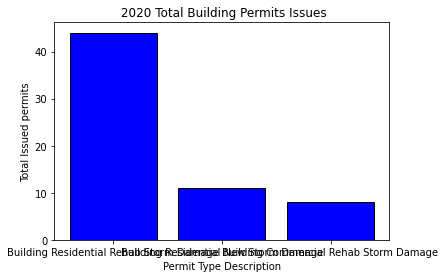

In [239]:
plt.bar('Permit Type Description', 'Count', data=count_2020_type, color = 'blue', edgecolor = 'black');
plt.xlabel('Permit Type Description')
plt.ylabel('Total Issued permits')
plt.title(' 2020 Total Building Permits Issues');

In [240]:
count_2019_type = building_permits_2019['Permit Type Description'].value_counts().to_frame().reset_index()

In [241]:
count_2019_type

,index,Permit Type Description
0,Building Residential - New,779
1,Building Commercial - Rehab,232
2,Building Residential - Addition,177
3,Building Sign Permit,150
4,Building Residential - Rehab,124
5,Building Commercial - Tenant Finish Out,117
6,Building Use & Occupancy,94
7,Building Commercial - New,83
8,Building Demolition Permit,71
9,Building Residential - Roofing / Siding,64


In [242]:
count_2019_type = count_2019_type.rename(columns = {'index':'Permit Type Description', 'Permit Type Description':'Count'})

In [243]:
count_2019_type

,Permit Type Description,Count
0,Building Residential - New,779
1,Building Commercial - Rehab,232
2,Building Residential - Addition,177
3,Building Sign Permit,150
4,Building Residential - Rehab,124
5,Building Commercial - Tenant Finish Out,117
6,Building Use & Occupancy,94
7,Building Commercial - New,83
8,Building Demolition Permit,71
9,Building Residential - Roofing / Siding,64


In [244]:
count_2019_type = count_2019_type.loc[count_2019_type['Permit Type Description'].isin(['Building Residential Rehab Storm Damage', 'Building Residential New Storm Damage', 'Building Commercial Rehab Storm Damage'])]

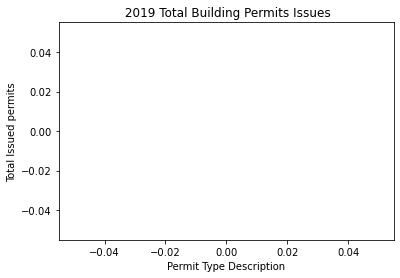

In [255]:
plt.bar('Permit Type Description', 'Count', data=count_2019_type, color = 'blue', edgecolor = 'black');
plt.xlabel('Permit Type Description')
plt.ylabel('Total Issued permits')
plt.title(' 2019 Total Building Permits Issues');

In [246]:
building_permits_2019['Permit Type Description'].value_counts()

Building Residential - New                  779
Building Commercial - Rehab                 232
Building Residential - Addition             177
Building Sign Permit                        150
Building Residential - Rehab                124
Building Commercial - Tenant Finish Out     117
Building Use & Occupancy                     94
Building Commercial - New                    83
Building Demolition Permit                   71
Building Residential - Roofing / Siding      64
Building Tree Removal Permit                 40
Building Commercial - Shell                  12
Building Commercial - Addition               11
Building Commercial - Roofing / Siding       10
Building Commercial - Foundation              8
Building Residential - Fire Damage            8
Building Commercial - Structural Frame        7
Building Commercial - Fire Damage             6
Building Residential - Change Contractor      6
Building Residential - Tenant Finish Out      1
Building Residential - Amend Permit     

In [247]:
count_2019 = building_permits_2019['month'].value_counts().to_frame().reset_index()

In [248]:
count_2019

,index,month
0,05,423
1,04,415
2,06,362
3,02,307
4,03,288
5,01,207


In [249]:
count_2019 = count_2019.rename(columns = {'index':'month', 'month':'Count'})

In [250]:
count_2019

,month,Count
0,05,423
1,04,415
2,06,362
3,02,307
4,03,288
5,01,207


In [251]:
count_2019['month'] = count_2019['month'].astype(int)

In [252]:
count_2019

,month,Count
0,5,423
1,4,415
2,6,362
3,2,307
4,3,288
5,1,207


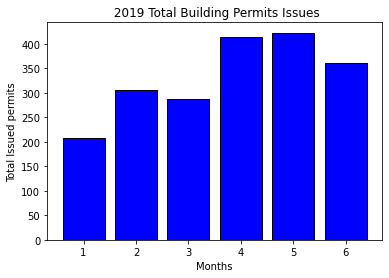

In [253]:
plt.bar('month', 'Count', data=count_2019, color = 'blue', edgecolor = 'black');
plt.xlabel('Months')
plt.ylabel('Total Issued permits')
plt.title(' 2019 Total Building Permits Issues');


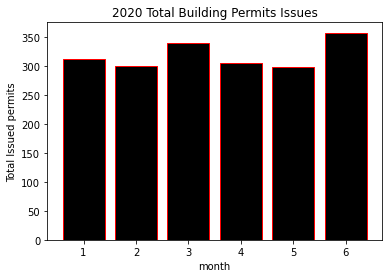

In [254]:
plt.bar('month', 'Count', data=count_2020, color = 'black', edgecolor = 'red');
plt.xlabel('month')
plt.ylabel('Total Issued permits')
plt.title('2020 Total Building Permits Issues');


NameError: name 't' is not defined

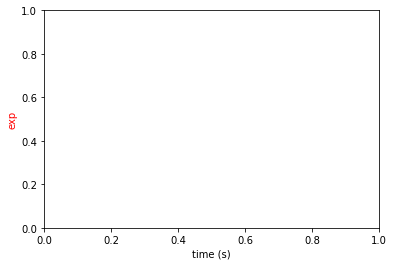

In [45]:
fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color);

In [ ]:
zipcodes = gpd.read_file('../geospatial-python-workshop-Mikeyoz/data/zipcodes.geojson')

In [ ]:
#zipcodes.head()

In [ ]:
building_permits_by_zip = gpd.sjoin(zipcodes, building_permits_df, op = 'within')

In [ ]:
#draw our zip code area: 37207
#nash_map = folium.Map(location = [36.16784, -86.77816], zoom_start = 12)


#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

#for row_index, row_values in building_permits_df.iterrows():
    #loc = [row_values['lat'], row_values['long']]
    #pop = str('ZIP: ') + str(row_values['ZIP'] + " " + " " + " " + str('Permit Type: ') + str(row_values['Permit Type Description']))
    #icon=folium.Icon(color=color('red'), icon="building", prefix='fa')
    
    #marker = folium.Marker(
        #location = loc, 
        #popup = pop, icon = icon) 
    #marker.add_to(nash_map)
#nash_map.save('../maps/nash_map_accidents.html')
#display our map
#nash_map